In [ ]:
# it will tell you gpu
!nvidia-smi

Sun Nov 29 08:00:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:

!pip install keras==2.3.1
!pip install tensorflow==1.14.0

     |████████████████████████████████| 378kB 11.4MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 109.2MB 38kB/s 
     |████████████████████████████████| 3.2MB 42.0MB/s 
     |████████████████████████████████| 491kB 50.9MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
import tensorflow as tf
tf.__version__

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

'1.14.0'

In [ ]:
# importing all required libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
img_rows = 224
img_cols = 224

In [ ]:
data_gen=ImageDataGenerator(
                            featurewise_center=False,  
                            samplewise_center=False, 
                            featurewise_std_normalization=False,  
                            samplewise_std_normalization=False,  
                            zca_whitening=False,
                            rotation_range=0,
                            shear_range=0.5,
                            zoom_range=0,
                            rescale=1./255,
                            vertical_flip=True,
                            validation_split=0,
                            width_shift_range=0,
                            height_shift_range=0,
                            horizontal_flip=True)

In [ ]:
train_generator = data_gen.flow_from_directory('/content/drive/MyDrive/tumor/Training',
                                               target_size=(img_rows,img_cols),
                                               batch_size=40,
                                               class_mode='categorical',
                                               color_mode='rgb',
                                               shuffle=True,
                                               subset='training'
                                               )

Found 2870 images belonging to 4 classes.


In [ ]:
train_generator.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [ ]:
test_generator = data_gen.flow_from_directory('/content/drive/MyDrive/tumor/Testing',
                                               target_size=(img_rows,img_cols),
                                               batch_size=40,
                                               class_mode='categorical',
                                               color_mode='rgb',
                                               shuffle=True,
                                              seed = None,
                                               subset='validation'
                                               )

Found 0 images belonging to 4 classes.


In [ ]:
test_generator.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [ ]:
# intalizing the cnn

model = Sequential()

# step adding convolutional

model.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))

# step adding pooling

model.add(MaxPool2D(pool_size=(2,2)))
# adding dropout layer
model.add(Dropout(0.25))


# adding another convolutional layer

model.add(Conv2D(128,(3,3),activation='relu'))

# adding pooling
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# adding convolutional network
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.25))

# adding convolutional network

model.add(Conv2D(256,(2,2),input_shape=(224,224,3),activation='relu'))

# step adding pooling

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# adding dropout layer
model.add(Dropout(0.3))

# flatten the data

model.add(Flatten())

# Adding full connection

model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=4,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(train_generator,epochs=50,validation_data=test_generator,steps_per_epoch=57)
model.save('/content/drive/MyDrive/tumor/tumor_model.h5')
print('save model')


Epoch 1/50
54/57 [===========================>..] - ETA: 1:00 - loss: 1.3652 - accuracy: 0.4660

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


57/57 [==============================] - 1172s 21s/step - loss: 1.3530 - accuracy: 0.4696
Epoch 2/50


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


57/57 [==============================] - 818s 14s/step - loss: 0.9717 - accuracy: 0.5952
Epoch 3/50
57/57 [==============================] - 681s 12s/step - loss: 0.9025 - accuracy: 0.6346
Epoch 4/50
57/57 [==============================] - 652s 11s/step - loss: 0.8080 - accuracy: 0.6656
Epoch 5/50
57/57 [==============================] - 673s 12s/step - loss: 0.7763 - accuracy: 0.6772
Epoch 6/50
57/57 [==============================] - 638s 11s/step - loss: 0.7197 - accuracy: 0.7066
Epoch 7/50
57/57 [==============================] - 638s 11s/step - loss: 0.6711 - accuracy: 0.7252
Epoch 8/50
57/57 [==============================] - 631s 11s/step - loss: 0.5651 - accuracy: 0.7803
Epoch 9/50
57/57 [==============================] - 614s 11s/step - loss: 0.5602 - accuracy: 0.7872
Epoch 10/50
57/57 [==============================] - 620s 11s/step - loss: 0.5031 - accuracy: 0.8053
Epoch 11/50
57/57 [==============================] - 649s 11s/step - loss: 0.4632 - accuracy: 0.8159
Epoch 12/

In [ ]:
history_dict = model.history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


In [ ]:
# model.save('tumor.h5')
# model.save('/content/drive/MyDrive/tumor/tumor_model.h5')

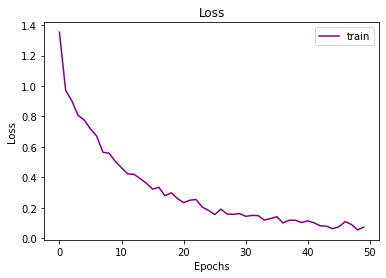

In [ ]:
plt.plot(model.history.history['loss'],c='purple')
# plt.plot(model.history.history['val_loss'],c='orange')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()

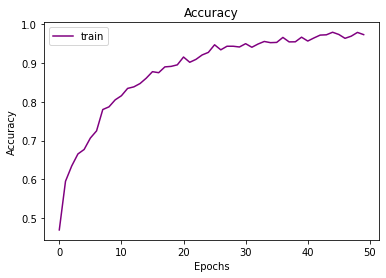

In [ ]:
plt.plot(model.history.history["accuracy"],c = "purple")
# plt.plot(model.history.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()